In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
num_data = 1000
num_epoch = 10000

#가우시안 노이즈 
noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
#(-15,15) 로 균등하게 분포 > 무작위로
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2)+3 + noise


In [7]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6,10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1)
)

In [8]:
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr = 0.0002)

In [9]:
loss_array = []
for i in range(num_epoch):
  #기울기 초기화 
  optimizer.zero_grad()
  output = model(x)
  loss = loss_func(output,y)
  #가중치 재배치
  loss.backward()
  #model.parameters()에서 리턴하는 기울기에서 lr만큼 이동
  optimizer.step()


  loss_array.append(loss)

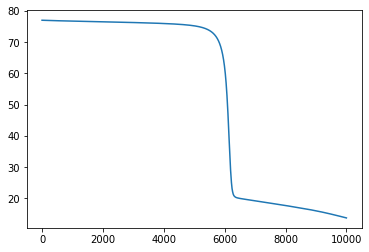

In [10]:
import matplotlib.pyplot as plt
plt.plot(loss_array)
plt.show()